<a href="https://colab.research.google.com/github/daishek/bigdata-univ/blob/main/tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Développement d'un modèle

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
path = "automobileEDA.csv"

df = pd.read_csv(path)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Simple Linear Regression

In [ ]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

### Highway-mpg x Price

In [ ]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

Yhat = lm.predict(X)

In [ ]:
# => b0
lm.intercept_

38423.3058581574

In [ ]:
# => b1
lm.coef_

array([-821.73337832])

*The relation between 'highway-mpg' and 'price'*

Price = 38423.3058581574 - 821.73337832 * highway-mpg

### Engine-size x Price

In [ ]:
X = df[['engine-size']]
Y = df['price']
lm.fit(X, Y)

Yhat = lm.predict(X)

In [ ]:
# => b0
lm.intercept_

-7963.338906281042

In [ ]:
# => b0
lm.coef_

array([166.86001569])

*The relation between 'engine-size' and 'price'*

Price = 166.86001569 * engine-size - 7963.338906281042

### 1.1. Évaluation du modèle à l'aide de la visualisation

In [ ]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='highway-mpg', ylabel='price'>

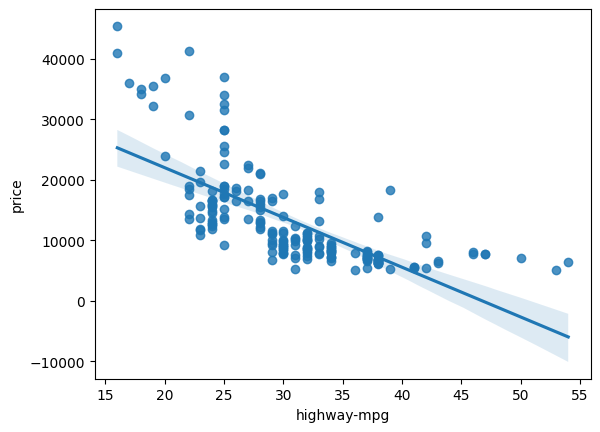

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

<Axes: xlabel='engine-size', ylabel='price'>

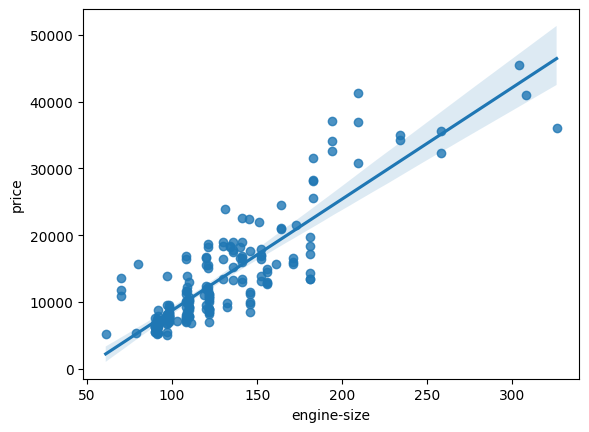

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)

Nous pouvons constater que le prix est corrélé positivement avec engine-size

### 1.2. Mesures pour l'évaluation dans l'échantillon

In [ ]:
from sklearn.metrics import mean_squared_error
# R2 & MSE for engine size

print('The 𝑅-square is: ', lm.score(X, Y))

mse = mean_squared_error(df['price'], Yhat)
print("The MSE is: ", mse)

The 𝑅-square is:  0.7609686443622008
The MSE is:  15021126.025174143


### 1.3. Training/Testing Set


In [ ]:
from sklearn.model_selection import train_test_split

x_data = df.drop('price', axis=1)
y_data = df['price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  61
number of training samples:  140


In [ ]:
SLR = LinearRegression()
SLR.fit(x_train[['highway-mpg']], y_train)
Yhat_train = SLR.predict(x_train[['highway-mpg']])

In [ ]:
SLR.intercept_

35442.18543585601

In [ ]:
SLR.coef_

array([-741.32938364])

In [ ]:
# => R2
print('The 𝑅-square is: ', SLR.score(x_train[['highway-mpg']], y_train))

The 𝑅-square is:  0.4998847732603432


=> Ce modèle est moins optimal pour les données.

## 2. Multiple Linear Regression

y^ = b0 + b1.x1 + b2.x2 + b3.x3 ...


*   b0: intercept (x=0)
*   b1: le coefficient ou parametre de x_1
*   b2: le coefficient ou parametre de x_2



Nous développons un modèle utilisant les variables 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg' comme variables prédictives :

In [ ]:
lm2 = LinearRegression()
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2.fit(z, df['price'])

Yhat = lm2.predict(z)

print(lm2.intercept_)
print(lm2.coef_)

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


Price = 15806.62 + 53.50*horsepower + 4.7*curb-weight + 81.53*engine-size + 36.05 * highway-mpg

### 2.1.Évaluation du modèle à l'aide de la visualisation

<ipython-input-42-8886a918bfb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual value")
<ipython-input-42-8886a918bfb4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted values", 

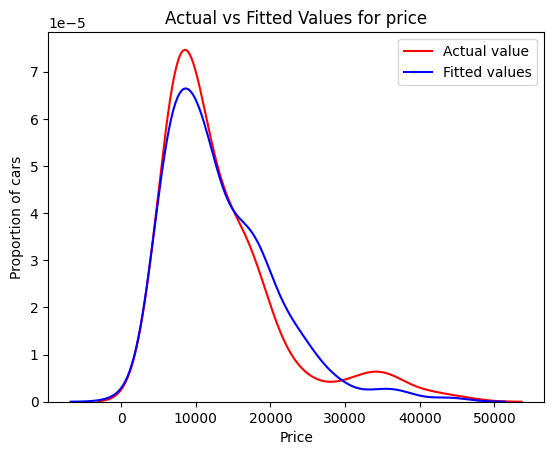

In [ ]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted values", ax=ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('Price')
plt.ylabel('Proportion of cars')

plt.legend()
plt.show()
plt.close()

**Question 7**

In [ ]:
lm3 = LinearRegression()
z = df[['normalized-losses','horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm3.fit(z, df['price'])

Yhat = lm3.predict(z)

print("Intercept: ", lm3.intercept_)
print("Coef: ", lm3.coef_)

Intercept:  -16049.268848908843
Coef:  [ 1.75549613 52.98719059  4.72204233 81.69049189 36.84220503]


<ipython-input-46-83cb1226f5dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['price'], hist=False, color="r", label="Actual value")
<ipython-input-46-83cb1226f5dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted values", a

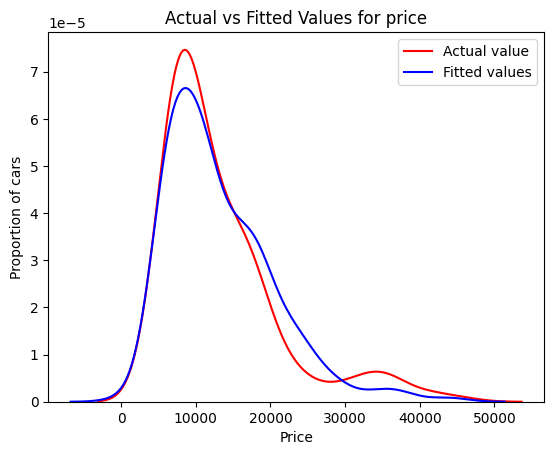

In [ ]:
ax = sns.distplot(df['price'], hist=False, color="r", label="Actual value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted values", ax=ax)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('Price')
plt.ylabel('Proportion of cars')

plt.legend()
plt.show()
plt.close()

same plot => 'normalized-losses' has no effect

In [ ]:
print("R2: ", lm3.score(z, df['price']))

mse = mean_squared_error(df['price'], Yhat)
print("The MSE is: ", mse)

R2:  0.8094030198667646
The MSE is:  11977429.701470537


=> R2 (simple linear regression) < R2 (multiple linear regression)

=> multiple linear regression is the best model in this case